# First Kaggle challenge - Titanic

## Machine Learning from Disaster

- v1.2_022020
- author: marcusRB
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

```
####
In this version I use only few feature, I try an another cleansing method.
I use same ML algorithms
####

```

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Check the versions of libraries

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:01:53) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.2.1
numpy: 1.16.3
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.20.3


***

## Import Libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

***

## Load dataset

Kaggle we provide two datasets: train and test in csv extension. So, we check and analyze only train file.

In [3]:
# Load dataset train and test
train_titanic = pd.read_csv('train.csv')
test_titanic = pd.read_csv('test.csv')

# Create titanis list with both dataset to use same cleansing methods
titanic_list = [train_titanic, test_titanic]

***

## Data description

Nuestro conjunto de datos tiene 12 columnas o varables, de las cuales 3 (Age, Cabin y Embarked) tienen valores no disponibles. La variable que queremos predecir es Survived, que nos indica si el pasajero sobrevivió a la tragedia del Titanic.

In [4]:
# Check dataframe structure
for information in titanic_list:
    information.info()
    print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [5]:
# Check dataframe basic stats data
for stats in titanic_list:
    print(stats)
    print('_'*40)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25          

In [6]:
# Check test dataframe basic stats data
for descrip in titanic_list:
    print(descrip.describe())
    print('_'*40)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
________________________________________
       PassengerId      Pclass         A

***

### EDA, Visualization and transformation data

We analyze all variable one by one and check null value, errors or we create new variables.

In [7]:
# Check null and NA values for both dataset
for nuls in titanic_list:
    print(nuls.isna().sum())
    print('_'*40)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
________________________________________


In [8]:
# Table of relative frequency
for nuls in titanic_list:
    print(nuls.isnull().sum()/len(nuls)*100)
    print('_'*40)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
________________________________________
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64
________________________________________


We need to check those 3 features, but it must probable remove `Cabin`, there are many null values.

#### `PassangerId`
Id of the passenger. We remove it because haven't predictive weight on our model.

In [9]:
# Check first 10 elements
for passenger in titanic_list:
    print(passenger['PassengerId'].head(10))
    print('_'*40)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64
________________________________________
0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
8    900
9    901
Name: PassengerId, dtype: int64
________________________________________


In [10]:
# Remove PassengerId variable only for train dataset
titanic_list[0].drop(['PassengerId'], axis=1, inplace=True)

In [11]:
# Check train dataset
titanic_list[0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### `Survived`

This is our depedent variable or predictor, it check if passenger survived (`1`) or not (`0`). Almost 38% of passenger survived.

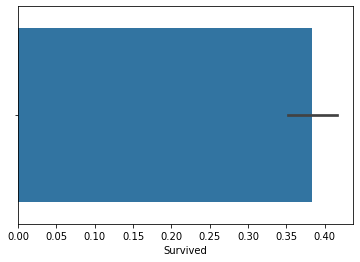

In [12]:
sns.barplot(x="Survived", data=titanic_list[0])

In [13]:
titanic_list[0].describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

#### `Pclass`

Ticket class. This is a categorical feature with 3 different values, first class, second class and third class. Exist high correlation between this feature with dependent variable.

In [14]:
titanic_list[0][['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


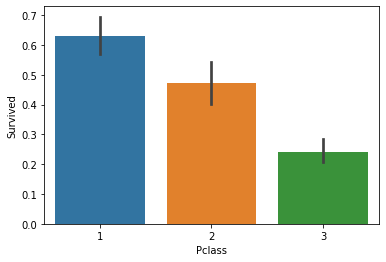

In [15]:
sns.barplot(x="Pclass", y="Survived", data=titanic_list[0])

#### `Sex`

Passenger genre. It's a categorical feature with two values, `male` y `female`. We converted it a dummy or binary value.

In [16]:
# Check the survived ratio with sex
titanic_list[0][["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


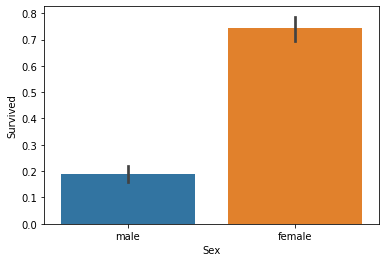

In [17]:
sns.barplot(x="Sex", y="Survived", data=titanic_list[0])

In [18]:
# Convert categorical variable to binary variable - female 1 and male 0
for genre in titanic_list:
    genre['Sex'] = genre['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [19]:
# Check Sex features
titanic_list[0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic_list[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


#### `SibSp`

Numerical feature. Indicate a sibling of passenger.

In [21]:
titanic_list[0][["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


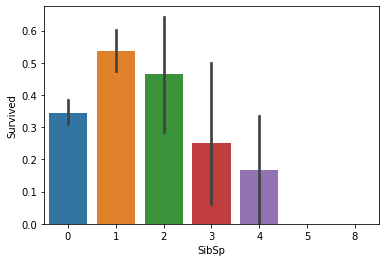

In [22]:
sns.barplot(x="SibSp", y="Survived", data=titanic_list[0])

#### `Parch`

Father and childs of passenger. Numerical variable

In [23]:
titanic_list[0][["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


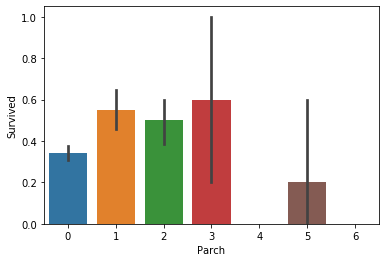

In [24]:
sns.barplot(x="Parch", y="Survived", data=titanic_list[0])

#### `FamilySize`

Create new feature, called FamilySize, where we summarize `SibSp` and `Parch` as numerical variable.

In [25]:
# Create a new feature
for famsize in titanic_list:
    famsize['FamilySize'] = famsize['SibSp'] + famsize['Parch'] + 1

In [26]:
titanic_list[0][["FamilySize", "Survived"]].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


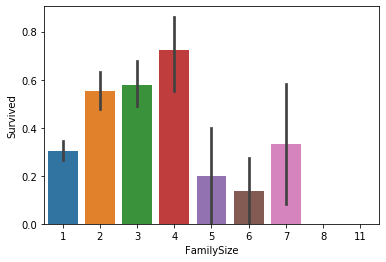

In [27]:
sns.barplot(x="FamilySize", y="Survived", data=titanic_list[0])

#### `IsAlone`

We create new feature caracterized if passanger travel alone or not, based on familySize. The binary feature is called `IsAlone`.

In [28]:
for alone in titanic_list:
    alone['IsAlone'] = 0
    alone.loc[alone['FamilySize'] == 1, 'IsAlone'] = 1

# Check new feature with predictor    
titanic_list[0][['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


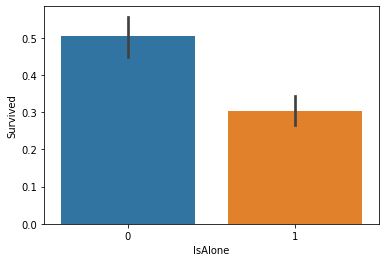

In [29]:
sns.barplot(x="IsAlone", y="Survived", data=titanic_list[0])

In [30]:
# Check new features in dataset train
titanic_list[1].head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,3,0


#### `Ticket`

Ticket number of the passanger. In first instance isn't important for the model. We removed it.

In [31]:
# We remove Ticket variable in both traing and test dataset
for tick in titanic_list:
    tick.drop(['Ticket'], axis=1, inplace=True)

In [32]:
# We check the dataset again - train
titanic_list[0].head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,2,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,2,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1,1
5,0,3,"Moran, Mr. James",0,NaN,0,0,8.4583,NaN,Q,1,1
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,E46,S,1,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,NaN,S,5,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,NaN,S,3,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,NaN,C,2,0


In [33]:
# ...and test dataset
titanic_list[1].head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,NaN,S,3,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,9.2250,NaN,S,1,1
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,7.6292,NaN,Q,1,1
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,29.0000,NaN,S,3,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,7.2292,NaN,C,1,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,24.1500,NaN,S,3,0


### `Embarked`

This feature is Port of Embarkation. There are three categorical variables: `C` for Cherbourg, `Q` for Queenstown, `S` for Southampton.

In [34]:
# Check ratio Embarked and Survived variable
titanic_list[0][['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [35]:
# Fill na or null values with the most frequent value, C
freq_port = titanic_list[0].Embarked.dropna().mode()[0]
freq_port

'S'

In [36]:
# Assign result on the dataset
for port in titanic_list:
    port['Embarked'] = port['Embarked'].fillna(freq_port)

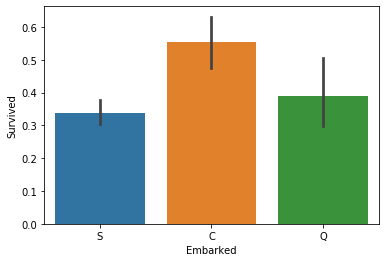

In [37]:
sns.barplot(x="Embarked", y="Survived", data=titanic_list[0])

#### `Fare`

This continuous numerical variable is ticket fare of the passenger.

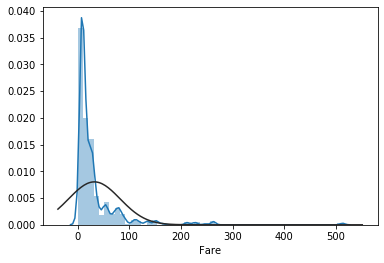

In [38]:
sns.distplot(titanic_list[0]['Fare'], fit=norm)

After check the variable, has a normal distribution. We apply a logarithm to normalize. 

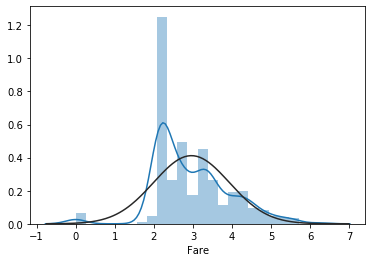

In [39]:
for f in titanic_list:
    f['Fare'] = np.log1p(f['Fare'])
sns.distplot(titanic_list[0]['Fare'], fit=norm)

We transform to categorical variable

In [40]:
for faregr in titanic_list:
    faregr['FareGroup'] = pd.qcut(faregr['Fare'], 8, labels=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])


titanic_list[0][['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean()

,FareGroup,Survived
0,A,0.207143
1,B,0.180723
2,C,0.198198
3,D,0.407080
4,E,0.436364
5,F,0.473214
6,G,0.481818
7,H,0.678571


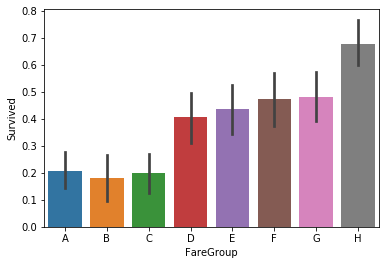

In [41]:
sns.barplot(x="FareGroup", y="Survived", data=titanic_list[0])

In [42]:
# We remove the variable Fare
for fares in titanic_list:
    fares.drop(['Fare'], axis=1, inplace=True)

#### `Cabin`

We transform this feature in binary variable, so it inform if he was or not in the cabin.

In [43]:
for cab in titanic_list:
    cab['InCabin'] = ~cab['Cabin'].isnull()

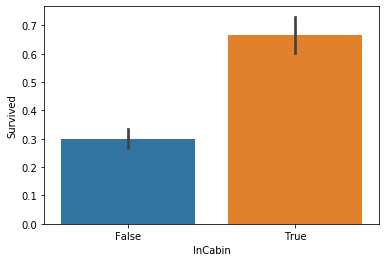

In [44]:
sns.barplot(x="InCabin", y="Survived", data=titanic_list[0])
plt.show()

In [45]:
# We remove the variable Cabin
for cabin in titanic_list:
    cabin.drop(['Cabin'], axis=1, inplace=True)

#### `Age`

Numerical variable with age of the passenger. We transform in categorical variable and grouped.

In [46]:
#train_titanic['Age'] = train_titanic['Age'].fillna((train_titanic['Age'].mean()), inplace=True)

In [47]:
bins = [-np.inf, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
for age in titanic_list:
    age['Age'].fillna((age['Age'].mean()), inplace=True)
    age['AgeGroup'] = pd.cut(age["Age"], 8, labels = labels)

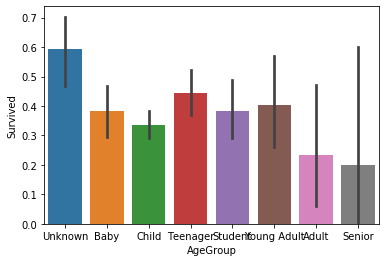

In [48]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic_list[0])
plt.show()

In [49]:
# We remove the variable Age
#for a in titanic_list:
#    a.drop(['Age'], axis=1, inplace=True)

#### `Name`

Categorical variable with the name of the passenger. We extract from title names like as `Mr`, `Miss` or `Master`.

In [50]:
# Check the names
titanic_list[0]['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [51]:
# Create the function to extract the title
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Apply get_title function
for title in titanic_list:
    title['Title'] = title['Name'].apply(get_title)

# Check the results
pd.crosstab(titanic_list[0]['Title'], titanic_list[0]['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


Create groups for all frequents titles and the other will be `Rare`.

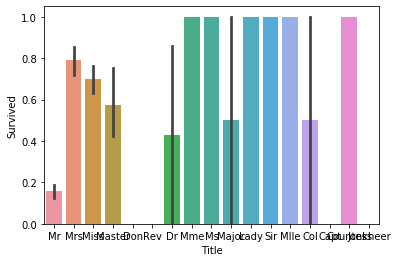

In [52]:
sns.barplot(x="Title", y="Survived", data=titanic_list[0])
plt.show()

In [53]:
# Remove Name variable
for name in titanic_list:
    name.drop(['Name'], axis=1, inplace=True)

In [54]:
# Check all values and new features
titanic_list[0].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,AgeGroup,Title
0,0,3,0,22.000000,1,0,S,2,0,A,False,Child,Mr
1,1,1,1,38.000000,1,0,C,2,0,H,True,Teenager,Mrs
2,1,3,1,26.000000,0,0,S,1,1,C,False,Child,Miss
3,1,1,1,35.000000,1,0,S,2,0,G,True,Teenager,Mrs
4,0,3,0,35.000000,0,0,S,1,1,C,False,Teenager,Mr
5,0,3,0,29.699118,0,0,Q,1,1,C,False,Child,Mr
6,0,1,0,54.000000,0,0,S,1,1,G,True,Young Adult,Mr
7,0,3,0,2.000000,3,1,S,5,0,E,False,Unknown,Master
8,1,3,1,27.000000,0,2,S,3,0,D,False,Child,Mrs
9,1,2,1,14.000000,1,0,C,2,0,F,False,Baby,Mrs


In [55]:
titanic_list[1].head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,AgeGroup,Title
0,892,3,0,34.5,0,0,Q,1,1,B,False,Teenager,Mr
1,893,3,1,47.0,1,0,S,2,0,A,False,Student,Mrs
2,894,2,0,62.0,0,0,Q,1,1,C,False,Adult,Mr
3,895,3,0,27.0,0,0,S,1,1,C,False,Child,Mr
4,896,3,1,22.0,1,1,S,3,0,D,False,Child,Mrs
5,897,3,0,14.0,0,0,S,1,1,C,False,Baby,Mr
6,898,3,1,30.0,0,0,Q,1,1,A,False,Teenager,Miss
7,899,2,0,26.0,1,1,S,3,0,F,False,Child,Mr
8,900,3,1,18.0,0,0,C,1,1,A,False,Baby,Mrs
9,901,3,0,21.0,2,0,S,3,0,F,False,Child,Mr


In [56]:
titanic_list[0].shape, titanic_list[1].shape

((891, 13), (418, 13))

## Variable correlation

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation

Si visualizamos la matriz de correlación entre las variables, vemos que las mas correlacionadas con la que queremos predecir son `Sex`, `Pclass` i `isAlone`.

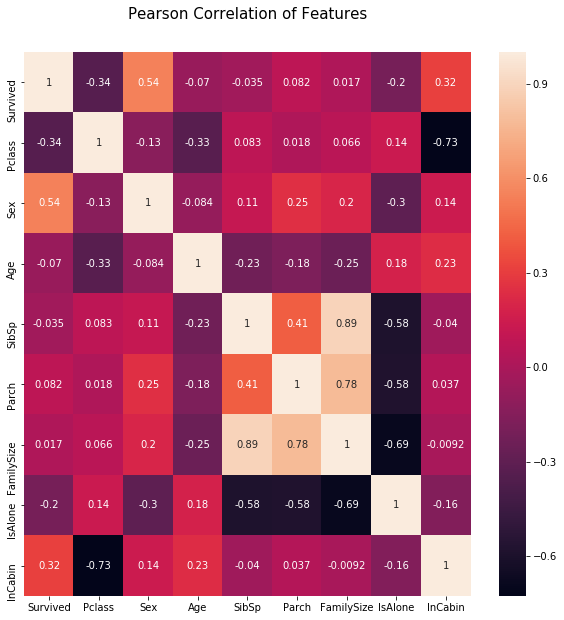

In [57]:
correlation_matrix = titanic_list[0].corr()
correlation_matrix

plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

## Binarizing categorical variables

De cada variable categórica haremos `m` variables binarias, donde `m` es el numero de categorías de la variable.

In [58]:
# The procedure is very simple, binarizing categorical variable for training dataset
cols = ['Pclass', 'Embarked', 'FareGroup', 'AgeGroup', 'Title']
titanic_categorical = titanic_list[0][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
titanic_categorical.head()
train_titanic_bin = pd.concat([titanic_list[0][titanic_list[0].columns[~titanic_list[0].columns.isin(cols)]], titanic_categorical], axis=1)
train_titanic_bin.head()

,Survived,Sex,Age,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,0,0,22.0,1,0,2,0,False,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,38.0,1,0,2,0,True,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,26.0,0,0,1,1,False,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,35.0,1,0,2,0,True,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,35.0,0,0,1,1,False,0,0,...,0,0,0,0,0,1,0,0,0,0


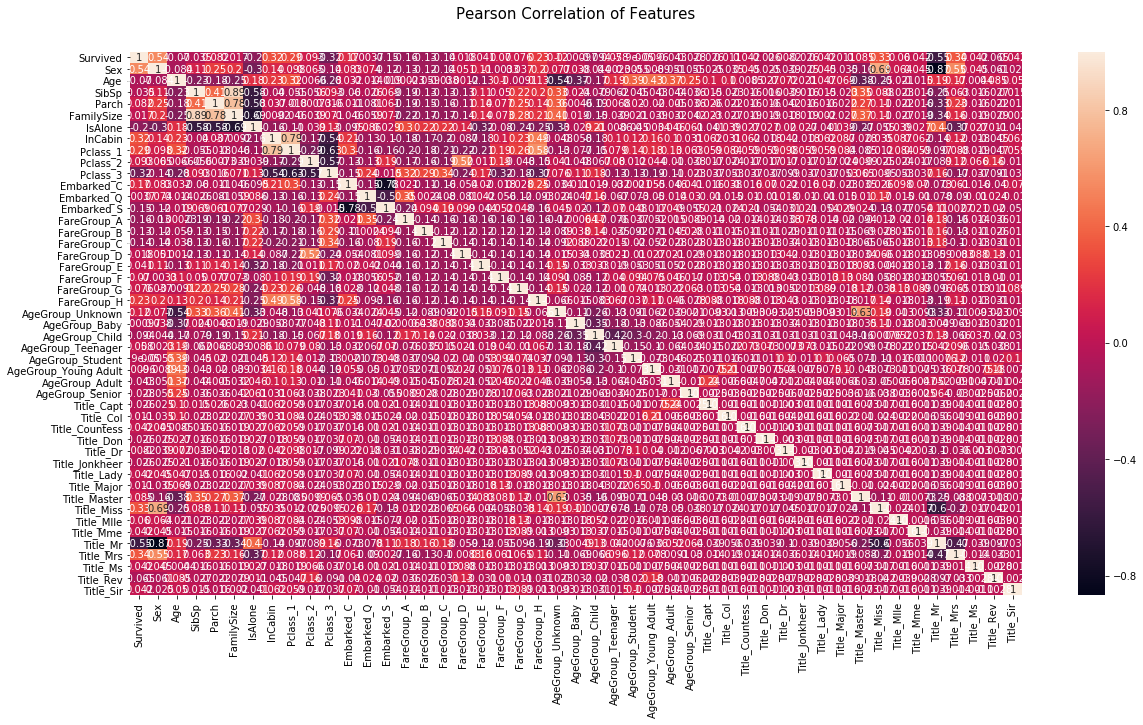

In [59]:
correlation_matrix = train_titanic_bin.corr()
correlation_matrix

#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix, annot=True)

In [60]:
# Binarizing variable for testing dataset
titanic_categorical = titanic_list[1][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
test_titanic_bin = pd.concat([titanic_list[1][titanic_list[1].columns[~titanic_list[1].columns.isin(cols)]], titanic_categorical], axis=1)
test_titanic_bin.head()

,PassengerId,Sex,Age,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,...,AgeGroup_Senior,Title_Col,Title_Dona,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Ms,Title_Rev
0,892,0,34.5,0,0,1,1,False,0,0,...,0,0,0,0,0,0,1,0,0,0
1,893,1,47.0,1,0,2,0,False,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,62.0,0,0,1,1,False,0,1,...,0,0,0,0,0,0,1,0,0,0
3,895,0,27.0,0,0,1,1,False,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,22.0,1,1,3,0,False,0,0,...,0,0,0,0,0,0,0,1,0,0


### Features selection

In [61]:
# Backup train and test dataset
train_bak = train_titanic_bin
test_bak = test_titanic_bin

In [62]:
train_titanic_bin.shape, test_titanic_bin.shape

((891, 47), (418, 39))

In [63]:
train_titanic_bin.columns.values

array(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize',
       'IsAlone', 'InCabin', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FareGroup_A',
       'FareGroup_B', 'FareGroup_C', 'FareGroup_D', 'FareGroup_E',
       'FareGroup_F', 'FareGroup_G', 'FareGroup_H', 'AgeGroup_Unknown',
       'AgeGroup_Baby', 'AgeGroup_Child', 'AgeGroup_Teenager',
       'AgeGroup_Student', 'AgeGroup_Young Adult', 'AgeGroup_Adult',
       'AgeGroup_Senior', 'Title_Capt', 'Title_Col', 'Title_Countess',
       'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir'], dtype=object)

In [64]:
test_titanic_bin.columns.values

array(['PassengerId', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize',
       'IsAlone', 'InCabin', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FareGroup_A',
       'FareGroup_B', 'FareGroup_C', 'FareGroup_D', 'FareGroup_E',
       'FareGroup_F', 'FareGroup_G', 'FareGroup_H', 'AgeGroup_Unknown',
       'AgeGroup_Baby', 'AgeGroup_Child', 'AgeGroup_Teenager',
       'AgeGroup_Student', 'AgeGroup_Young Adult', 'AgeGroup_Adult',
       'AgeGroup_Senior', 'Title_Col', 'Title_Dona', 'Title_Dr',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Ms',
       'Title_Rev'], dtype=object)

In [65]:
# Drop other features
for feature in train_titanic_bin, test_titanic_bin:
    feature.drop(['Parch'], axis=1, inplace=True)
    feature.drop(['SibSp'], axis=1, inplace=True)
    feature.drop(['Age'], axis=1, inplace=True)

In [66]:
train_titanic_vars = train_titanic_bin.columns.values.tolist()
Y = ['Survived']
X = [v for v in train_titanic_vars if v not in Y]

In [67]:
n = 15

In [68]:
from sklearn.feature_selection import RFE

In [69]:
lr = LogisticRegression()

In [70]:
rfe = RFE(lr, n)
rfe = rfe.fit(train_titanic_bin[X], train_titanic_bin[Y].values.ravel())

/Users/marcusrb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/marcusrb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/marcusrb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/marcusrb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/marcusrb/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

In [71]:
print(rfe.support_)

[ True False False  True False False  True False False  True  True False
 False  True False False False False  True False False False  True  True
  True False False False False  True False False False False  True False
 False False  True  True False  True False]


In [72]:
print(rfe.ranking_)

[ 1  2 12  1  3  4  1 17 18  1  1 20 28  1 24 23 11 10  1 14 19 13  1  1
  1  5  9 29 25  1  7  6 22 26  1 16 21 27  1  1 15  1  8]


In [73]:
z=zip(train_titanic_vars, rfe.support_, rfe.ranking_)

In [74]:
list(z)

[('Survived', True, 1),
 ('Sex', False, 2),
 ('FamilySize', False, 12),
 ('IsAlone', True, 1),
 ('InCabin', False, 3),
 ('Pclass_1', False, 4),
 ('Pclass_2', True, 1),
 ('Pclass_3', False, 17),
 ('Embarked_C', False, 18),
 ('Embarked_Q', True, 1),
 ('Embarked_S', True, 1),
 ('FareGroup_A', False, 20),
 ('FareGroup_B', False, 28),
 ('FareGroup_C', True, 1),
 ('FareGroup_D', False, 24),
 ('FareGroup_E', False, 23),
 ('FareGroup_F', False, 11),
 ('FareGroup_G', False, 10),
 ('FareGroup_H', True, 1),
 ('AgeGroup_Unknown', False, 14),
 ('AgeGroup_Baby', False, 19),
 ('AgeGroup_Child', False, 13),
 ('AgeGroup_Teenager', True, 1),
 ('AgeGroup_Student', True, 1),
 ('AgeGroup_Young Adult', True, 1),
 ('AgeGroup_Adult', False, 5),
 ('AgeGroup_Senior', False, 9),
 ('Title_Capt', False, 29),
 ('Title_Col', False, 25),
 ('Title_Countess', True, 1),
 ('Title_Don', False, 7),
 ('Title_Dr', False, 6),
 ('Title_Jonkheer', False, 22),
 ('Title_Lady', False, 26),
 ('Title_Major', True, 1),
 ('Title_Maste

In [75]:
cols = []
for v, s, r in zip(train_titanic_vars, rfe.support_, rfe.ranking_):
    if r >=1 and r <=12:
        cols.append(v)

In [76]:
cols

['Survived',
 'Sex',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_C',
 'FareGroup_F',
 'FareGroup_G',
 'FareGroup_H',
 'AgeGroup_Teenager',
 'AgeGroup_Student',
 'AgeGroup_Young Adult',
 'AgeGroup_Adult',
 'AgeGroup_Senior',
 'Title_Countess',
 'Title_Don',
 'Title_Dr',
 'Title_Major',
 'Title_Mme',
 'Title_Mr',
 'Title_Ms',
 'Title_Rev']

In [77]:
len(cols)

26

## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

In [78]:
X = train_titanic_bin[cols]
Y = train_titanic_bin['Survived']

In [79]:
X.head(10)

,Survived,Sex,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Embarked_Q,Embarked_S,FareGroup_C,...,AgeGroup_Adult,AgeGroup_Senior,Title_Countess,Title_Don,Title_Dr,Title_Major,Title_Mme,Title_Mr,Title_Ms,Title_Rev
0,0,0,2,0,False,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,2,0,True,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,False,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2,0,True,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,False,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,1,False,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,1,True,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,5,0,False,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,1,3,0,False,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,2,0,False,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
Y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [81]:
# Split and drop Survived variable
X_train = X.drop('Survived', axis=1)
Y_train = X['Survived']

In [82]:
X_train.columns.values.tolist()

['Sex',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_C',
 'FareGroup_F',
 'FareGroup_G',
 'FareGroup_H',
 'AgeGroup_Teenager',
 'AgeGroup_Student',
 'AgeGroup_Young Adult',
 'AgeGroup_Adult',
 'AgeGroup_Senior',
 'Title_Countess',
 'Title_Don',
 'Title_Dr',
 'Title_Major',
 'Title_Mme',
 'Title_Mr',
 'Title_Ms',
 'Title_Rev']

In [83]:
test_titanic_bin.shape, train_titanic_bin.shape

((418, 36), (891, 44))

In [84]:
validation_cols = X_train.columns.values.tolist()

In [85]:
validation = test_titanic_bin[validation_cols]

KeyError: "['Title_Major', 'Title_Don', 'Title_Mme', 'Title_Countess'] not in index"

In [ ]:
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 2

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, Y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

In [ ]:
# GBC Classifier
GBC_Model = GradientBoostingClassifier()

scores = cross_val_score(GBC_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

In [ ]:
# Linear Discriminant Analysis 
LDA_Model= LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

In [ ]:
# Logistic Regression
#
Log_Model = LogisticRegression(C=1)
scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

In [ ]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [ ]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

In [ ]:
#about 84%
VotingPredictor = VotingClassifier(estimators =
                           [('rfc', RFC_best), 
                            ('gbc', GBC_best),
                           ('svc', SVMC_best)],
                           voting='hard', n_jobs = 4)

# 82.97%
# VotingPredictor = VotingClassifier(estimators =
#                            [ ('rfc', RFC_best), 
#                             ('svc', SVMC_best),
#                             ('gbc', GBC_best),
#                             ('lda', LDA_best),
#                             ('lrm', LRM_best)],
#                            voting='soft', n_jobs = 4)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

In [ ]:
validation.head(10)

In [ ]:
# Drop PassengerId variable on test dataset
ids = test_titanic['PassengerId'] # create a sub-dataset for submission file and saving it 
#test_titanic = test_titanic.drop('PassengerId', axis=1)

In [ ]:
test_titanic.head(10)

In [ ]:
test_titanic.shape

In [ ]:
validation.shape

In [ ]:
ids.shape

In [ ]:
data_val = VotingPredictor.predict(validation)

In [ ]:
submission = pd.DataFrame({
    'PassengerId' : ids,
    'Survived': data_val
})

In [ ]:
submission.to_csv('titanic_model_2.csv', index=False)

In [ ]:
# Let's look inside
submission = pd.read_csv('titanic_model.csv')
submission.head()